<a href="https://colab.research.google.com/github/Muthoni-Kamotho/MNIST-cross-validation/blob/main/MNIST_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1, return_X_y=True)
X, y = mnist

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
kf = KFold(n_splits=10, shuffle=True, random_state=11)


In [4]:
knn = KNeighborsClassifier()
scores = cross_val_score(estimator=knn, X=X, y=y, cv=kf)

clf = DecisionTreeClassifier(random_state=42)
k_folds = KFold(n_splits = 10)
scores_1 = cross_val_score(clf, X, y, cv = k_folds)


In [7]:
print("Cross Validation Scores: ", scores_1)
print("Average CV Score: ", scores_1.mean())
print("Number of CV Scores used in Average: ", len(scores_1))

Cross Validation Scores:  [0.877      0.86685714 0.863      0.87242857 0.86542857 0.86228571
 0.87185714 0.87585714 0.87342857 0.89085714]
Average CV Score:  0.8718999999999999
Number of CV Scores used in Average:  10


In [10]:
average_accuracy = scores.mean()
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: {score:.4f}')

Fold 1: 0.9717
Fold 2: 0.9726
Fold 3: 0.9706
Fold 4: 0.9719
Fold 5: 0.9707
Fold 6: 0.9719
Fold 7: 0.9760
Fold 8: 0.9731
Fold 9: 0.9716
Fold 10: 0.9756


In [11]:
print(f'Average K-Fold Accuracy: {average_accuracy:.4f}')

Average K-Fold Accuracy: 0.9726


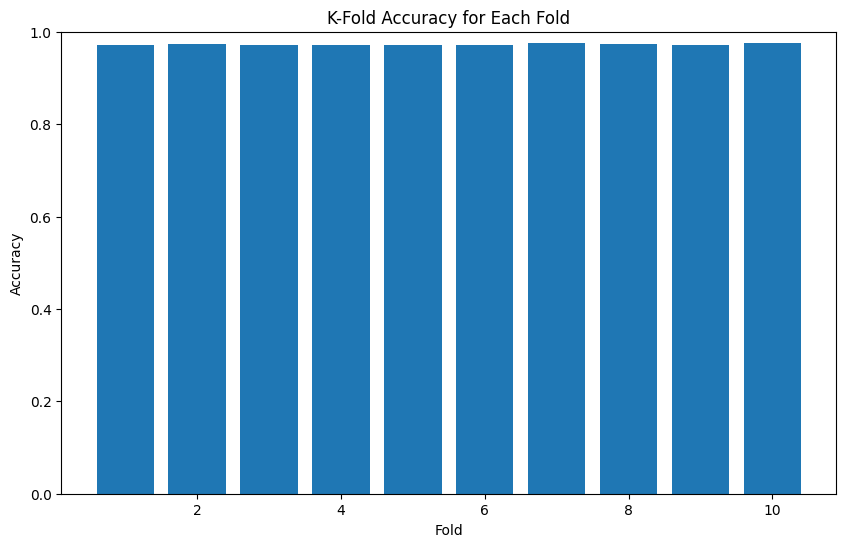

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(scores) + 1), scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('K-Fold Accuracy for Each Fold')
plt.ylim([0, 1])
plt.show()
